In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix

In [56]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [57]:
y.shape

(150, 1)

In [58]:
def continuous(y):
    m=y.shape
    # y=Y.to_numpy()
    temp=np.zeros(shape=m)

    for i in range(y.shape[0]):
        if y[i] =='Iris-setosa':
            temp[i] =0
        elif y[i] =='Iris-versicolor':
            temp[i]=1
        else:
            temp[i]=2

    return temp


y_continues=continuous(y.to_numpy())

In [59]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [60]:
X_train,X_,y_train,y_=train_test_split(X_scaled,y_continues,test_size=0.4,random_state=1)
X_cv,X_test,y_cv,y_test=train_test_split(X_,y_,test_size=0.5,random_state=1)

print(f"train size {X_train.shape} , {y_train.shape}")
print(f"cross validation size {X_cv.shape} , {y_cv.shape}")
print(f"test size {X_test.shape} , {y_test.shape}")

train size (90, 4) , (90, 1)
cross validation size (30, 4) , (30, 1)
test size (30, 4) , (30, 1)


In [61]:
model=Sequential([
    tf.keras.Input((4,)),
    Dense(units=4,activation='relu'),
    Dense(units=12,activation='relu'),
    Dense(units=12,activation='relu'),
    Dense(units=3,activation='linear')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275 (1.07 KB)

 Trainable params: 275 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(optimizer=Adam(5e-4),loss=SparseCategoricalCrossentropy(from_logits=True))
history=model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0241
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0143 
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0276 
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0046 
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0199 
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0100 
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9787 
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9915 
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9920 
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9877 
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9948 
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9981 
Epoch 13/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9698 
Epoch 14/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9659 
Epoch 15/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9635 
Epoch

In [72]:
logits=model.predict(X_train)
yhat_train=tf.nn.softmax(logits)
yhat_train=np.argmax(yhat_train,axis=1)
loss_train=np.mean(yhat_train!=y_train.squeeze())

logits=model.predict(X_cv)
yhat_cv=tf.nn.softmax(logits)
yhat_cv=np.argmax(yhat_cv,axis=1)
loss_cv=np.mean(yhat_cv!=y_cv.squeeze())

print(f"J_train = {loss_train}  \n J_cv = {loss_cv}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
J_train = 0.022222222222222223  
 J_cv = 0.03333333333333333


In [81]:
logits=model.predict(X_test)
yhat_test=tf.nn.softmax(logits)
yhat_test=np.argmax(yhat_test,axis=1)
loss_test=np.mean(yhat_test!=y_test.squeeze())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<Axes: >

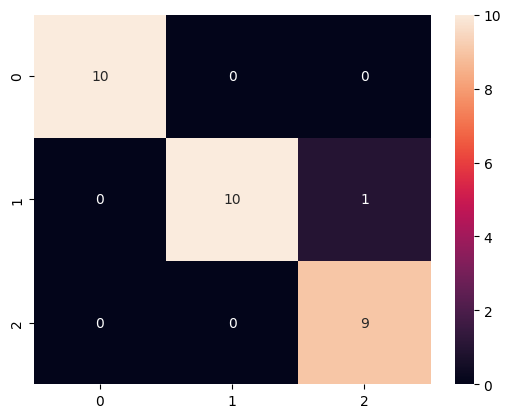

In [84]:
sns.heatmap(confusion_matrix(yhat_test,y_test),annot=True)